In [90]:
place_name = "Coburg, OR, USA"

In [2]:
import osmnx as ox

In [3]:
import geopandas as gpd

In [92]:
area = ox.geocode_to_gdf(place_name)

In [17]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"MULTIPOLYGON (((-123.05014 44.05531, -123.0501...",44.094935,44.023536,-122.879054,-123.050143,298040144,relation,186721,44.046236,-123.022029,"Springfield, Lane County, Oregon, United States",boundary,administrative,0.672105


In [6]:
type(area)

geopandas.geodataframe.GeoDataFrame

<Axes: >

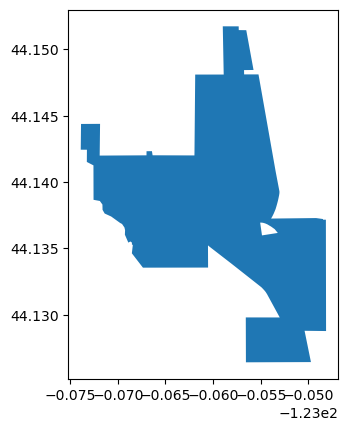

In [93]:
area.plot()

In [99]:
# List key-value pairs for tags
#tags = {'building': True}
# buildings = ox.geometries_from_place(place_name, tags)
# buildings.head()
tags = {'footway': True}
footway = ox.geometries_from_place(place_name, tags)

In [101]:
footway.columns

Index(['geometry'], dtype='object')

In [103]:
footway

,geometry


In [95]:
tags = {'highway': True}
highway = ox.geometries_from_place(place_name, tags)

In [79]:
selcols = ['highway','geometry','traffic_signals','crossing','bicycle','access','stop','direction','foot','cycleway','footway','sidewalk', 'lanes', 'construction']

In [37]:
list(highway.columns)

['highway',
 'geometry',
 'traffic_signals',
 'noref',
 'ref',
 'source',
 'noexit',
 'crossing',
 'bicycle',
 'access',
 'traffic_signals:direction',
 'note',
 'stop',
 'direction',
 'junction',
 'tiger:reviewed',
 'crossing:island',
 'tactile_paving',
 'traffic_calming',
 'foot',
 'horse',
 'motor_vehicle',
 'addr:state',
 'leisure',
 'name',
 'maxspeed',
 'traffic_sign',
 'traffic_sign:direction',
 'description',
 'distance',
 'inscription:en',
 'wheelchair',
 'bench',
 'bin',
 'bus',
 'covered',
 'network',
 'operator',
 'public_transport',
 'shelter',
 'description:en',
 'inscription',
 'kerb',
 'crossing_ref',
 'network:wikidata',
 'network:wikipedia',
 'flashing_lights',
 'cycleway',
 'noname',
 'button_operated',
 'man_made',
 'emergency',
 'level',
 'lit',
 'traffic_signals:sound',
 'traffic_signals:vibration',
 'route_ref',
 'departures_board',
 'seats',
 'brand',
 'brand:wikidata',
 'road_marking',
 'surface',
 'lamp_mount',
 'lamp_type',
 'direction:no_parking',
 'direction

In [69]:
highway.type.unique()

array(['Point', 'LineString', 'Polygon', 'MultiPolygon'], dtype=object)

In [39]:
highway.highway.unique()

array(['traffic_signals', 'turning_circle', 'turning_loop',
       'motorway_junction', 'crossing', 'stop', 'mini_roundabout',
       'milestone', 'bus_stop', 'trailhead', 'passing_place', 'give_way',
       'services', 'street_lamp', 'motorway_junction ref=12',
       'residential', 'service', 'tertiary', 'motorway_link', 'motorway',
       'secondary_link', 'primary', 'secondary', 'primary_link',
       'cycleway', 'unclassified', 'footway', 'path', 'tertiary_link',
       'trunk', 'steps', 'pedestrian', 'busway', 'living_street',
       'construction', 'track', 'trunk_link', 'proposed', 'platform'],
      dtype=object)

<Axes: >

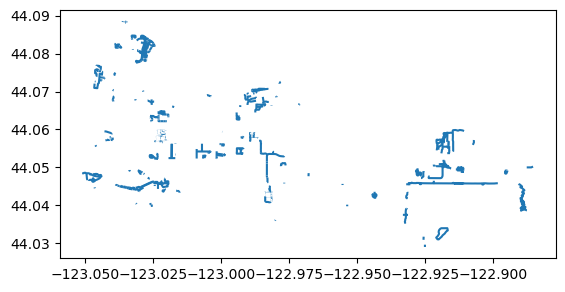

In [86]:
highway[(highway.highway.isin(['footway', 'steps', 'pedestrian', 'crossing', 'path', 'construction'])) & (highway.type !='Point')].plot()

In [98]:
highway.highway.unique()

array(['turning_circle', 'traffic_signals', 'motorway_junction',
       'crossing', 'street_lamp', 'stop', 'service', 'residential',
       'secondary', 'tertiary', 'motorway_link', 'motorway', 'services',
       'cycleway', 'footway'], dtype=object)

In [104]:
#highway[(highway.sidewalk != 'no') & (highway.type =='LineString')].plot() #(~highway.sidewalk.isnull()), (highway.type !='Point')

In [55]:
highway.sidewalk.unique()

array([nan, 'no', 'both', 'right', 'left', 'separate', 'yes'],
      dtype=object)

In [56]:
highway.footway.unique()

array([nan, 'sidewalk', 'crossing', 'access_aisle'], dtype=object)

In [58]:
highway.foot.unique()

array([nan, 'private', 'yes', 'designated', 'permissive', 'no',
       'destination'], dtype=object)

In [59]:
highway.access.unique()

array([nan, 'private', 'yes', 'no', 'destination', 'agricultural',
       'permissive', 'customers'], dtype=object)

In [63]:
highway.highway.unique()

array(['traffic_signals', 'turning_circle', 'turning_loop',
       'motorway_junction', 'crossing', 'stop', 'mini_roundabout',
       'milestone', 'bus_stop', 'trailhead', 'passing_place', 'give_way',
       'services', 'street_lamp', 'motorway_junction ref=12',
       'residential', 'service', 'tertiary', 'motorway_link', 'motorway',
       'secondary_link', 'primary', 'secondary', 'primary_link',
       'cycleway', 'unclassified', 'footway', 'path', 'tertiary_link',
       'trunk', 'steps', 'pedestrian', 'busway', 'living_street',
       'construction', 'track', 'trunk_link', 'proposed', 'platform'],
      dtype=object)

In [60]:
sel = (highway.highway=='path') & (highway.bicycle=='designated') & (highway.foot=='designated') & (highway.footway == 'sidewalk')

<Axes: >

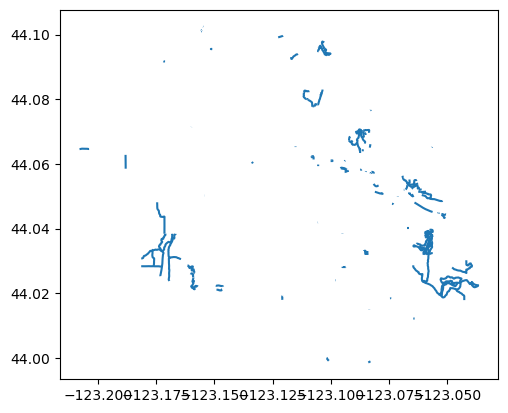

In [65]:
highway[highway.highway=='path'].plot()

<Axes: >

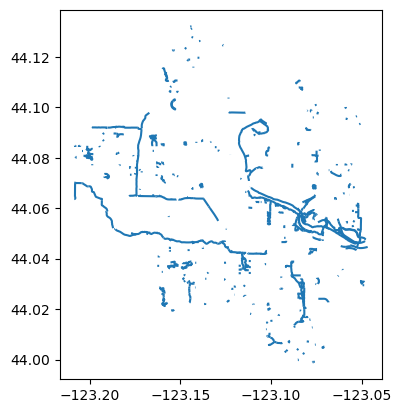

In [64]:
highway[highway.foot=='designated'].plot()

<Axes: >

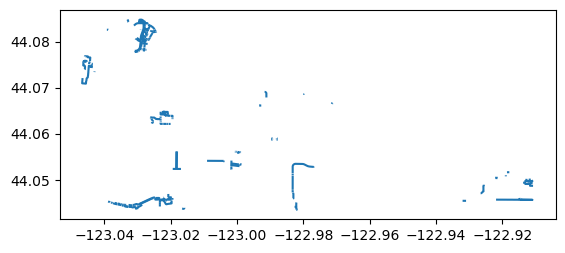

In [91]:
highway[highway.footway == 'sidewalk'].plot()

In [87]:
df = highway[(highway.type =='LineString')][selcols] #(highway.sidewalk != 'no') & 

In [88]:
df.rename(columns={'traffic_signals': 't_signals', 'construction': 'construct'}, inplace=True)

In [89]:
df.to_file('T:/DCProjects/Modeling/Sidewalk/temp/osm_highway_SPR.shp')  

C:\Users\clid1852\AppData\Local\Temp\ipykernel_1200\3232305796.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file('T:/DCProjects/Modeling/Sidewalk/temp/osm_highway_SPR.shp')


In [10]:
buildings  = buildings.loc[buildings.geom_type == 'Polygon', buildings.columns.str.contains('addr:|geometry')]

In [11]:
buildings.columns = buildings.columns.str.replace("addr:", "")

In [12]:
buildings.rename(columns={'housenumber': 'houseNo'}, inplace=True)

In [13]:
buildings.columns

Index(['state', 'geometry', 'city', 'country', 'houseNo', 'postcode',
       'street'],
      dtype='object')

In [14]:
# Save footprints 
buildings.to_file('T:/DCProjects/Modeling/Sidewalk/temp/edgewood_buildings.shp')  
# Or save in a more open source format
#buildings.to_file('../temp/edgewood_buildings.geojson', driver='GeoJSON')  

C:\Users\clid1852\AppData\Local\Temp\ipykernel_1200\759818116.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  buildings.to_file('T:/DCProjects/Modeling/Sidewalk/temp/edgewood_buildings.shp')
